# Simulação - Malha de controle com controlador PID

## UNIFEI - Universidade Federal de Itajubá

### Prof. Fernando H. D. Guaracy
### ECA602 - 2º Semestre de 2020 - RTE

In [1]:
%matplotlib inline

import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets

from ipywidgets import interact_manual
from ipywidgets import interact
from IPython.display import display, clear_output
from scipy.integrate import odeint
from matplotlib import animation
from IPython.display import HTML
from pylab import rcParams

rcParams['figure.figsize'] = 16, 9

In [2]:
#Configurações da simulação

ti = 0.001 #Passo de simulação

x0 = 0 #Valor inicial
sp = 1 #Setpoint

In [3]:
#Modelo do sistema
def modelo(x, t): 
  global u    

  x1,x2,x3 = x
  dxdt = [x2,x3,-x1-3*x2-3*x3+u]
      
  return dxdt





### Resposta do sistema ao degrau unitário em malha aberta

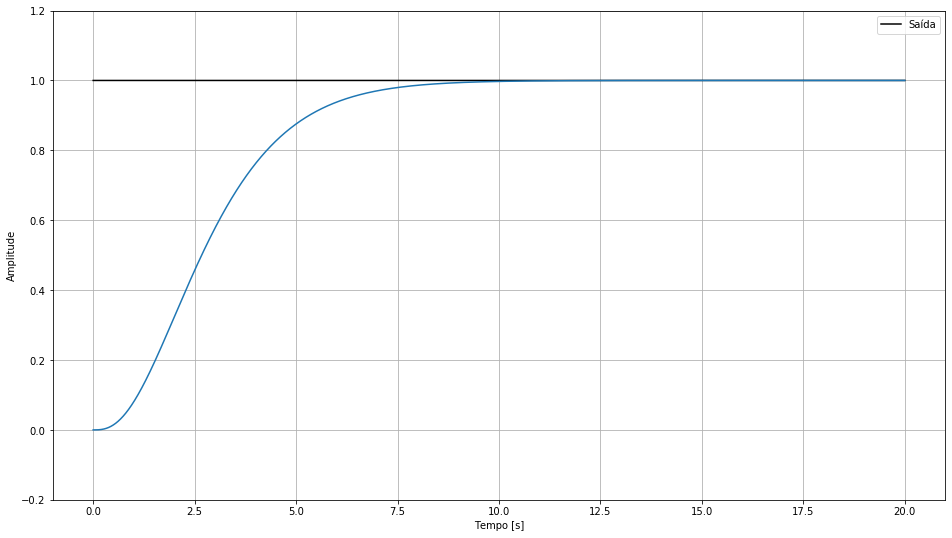

In [4]:
vet_t = []
vet_u = []
vet_y = []
    
xz = [[x0, 0, 0],[x0, 0, 0]]
    
 
#Loop de simulação
for i in range(0,20000,1):
    
  u = 1 

  #----Solução da EDO-------  
  xz = odeint(modelo, xz[1][:], [0,ti])  

  #----Armazenamento de dados----
  vet_t.append(i*ti)
  vet_u.append(u)
  vet_y.append(xz[1][0])      

    #Gera figuras (estáticas)   
plt.plot(vet_t,(np.ones(len(vet_t))),'k')
plt.plot(vet_t, vet_y)
plt.ylabel('Amplitude')
plt.xlabel('Tempo [s]')
plt.legend(['Saída'])
plt.ylim(top=1.2)
plt.ylim(bottom=-0.2)
plt.grid(True)

### Resposta do sistema a uma referência degrau unitário com o controlador PID em malha fechada

In [5]:
#Simulação
def simulacao(Kp,Ki,Kd):
#Parâmetros do controlador  

    #Inicialização de variáveis
    global u, vet_t, vet_u, vet_y    
    
    vet_t = []
    vet_u = []
    vet_y = []

    c0 = Kp + ti/2*Ki + Kd/ti 
    c1 = -Kp + ti/2*Ki - 2*Kd/ti    
    c2 = Kd/ti
    
    u = 0
    u_1 = 0
    e = 0
    e_1 = 0
    e_2 = 0
    xz = [[x0, 0, 0],[x0, 0, 0]]
    
    #Loop de simulação
    for i in range(0,20000,1):
      
      #----Lei de controle------           
      e = (sp - xz[1][0])      
        
      u = u_1 + c0*e + c1*e_1 + c2*e_2
        
      u_1 = u
      e_2 = e_1
      e_1 = e
      #-Fim da lei de controle----

      #----Solução da EDO-------  
      xz = odeint(modelo, xz[1][:], [0,ti])  

      #----Armazenamento de dados----
      vet_t.append(i*ti)
      vet_u.append(u)
      vet_y.append(xz[1][0])      

    #Gera figuras (estáticas)   
    plt.plot(vet_t,(np.ones(len(vet_t))),'k')
    plt.plot(vet_t, vet_y)
    plt.legend(['Referência','Saída'])
    plt.ylabel('Amplitude')
    plt.xlabel('Tempo [s]')
    plt.grid(True)

    return 

In [6]:
Kp_widget=widgets.FloatText(value=2,step=0.1)
Ki_widget=widgets.FloatText(value=0,step=0.1)
Kd_widget=widgets.FloatText(value=0,step=0.1)

interact(simulacao,Kp=Kp_widget,Ki=Ki_widget,Kd=Kd_widget,continuous_update=False);

interactive(children=(FloatText(value=2.0, description='Kp', step=0.1), FloatText(value=0.0, description='Ki',…